# REDES NEURONALES: EVALUACIÓN Y PREDICCIÓN

Este es un ejemplo de cómo se evalúan los diferentes tipos de redes neuronales, y cómo se hacen predicciones una vez se hayan creado las redes neuronales.

## Regresión

Vamos a hacer un ejemplo de un modelo de redes neuronales de regresión al que mediremos diferentes medidas de evaluación.

Para ello primero vamos a importar los paquetes de Python necesarios.

In [1]:
# NumPy
import numpy as np
# Scikit-learn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# TensorFlow
import tensorflow as tf
# Keras
from keras import Sequential
from keras.layers import Dense, Dropout

Ahora leeremos el dataset de diabetes y mostramos una descripción del dataset.

In [2]:
# Cargamos el dataset.
data = datasets.load_diabetes()

# Mostramos la descripción del dataset.
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Ahora dividimos el dataset, por una parte los atributos y por otra parte la variable objetivo.

In [3]:
# Atributos.
X_data = data.data

# Variable objetivo.
y_data = data.target

Dividimos el dataset en *train*, *test* y *validation*.

In [4]:
# Primero lo dividimos en train y test.
X_train_full, X_test, y_train_full, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=42)
# Ahora dividimos la parte de train en train y validation.
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

Escalamos los datos a una escala entre 0 y 1.

In [5]:
# Creamos el objeto para escalar los datos.
scaler = StandardScaler()

# Escalamos los datos train.
X_train = scaler.fit_transform(X_train)
# Escalamos los datos valid.
X_valid = scaler.transform(X_valid)
# Escalamos los datos test.
X_test = scaler.transform(X_test)

Creamos la red neuronal en modo secuencial.

In [6]:
# Creamos el modelo.
model = Sequential()
# Añadimos la capa de entrAda y una densa de 50 nodos.
model.add(Dense(50, input_dim=10, activation='relu'))
# Añadimos una capa densa de 100 nodos.
model.add(Dense(100, activation='relu'))
# Añadimos una capa densa de 100 nodos.
model.add(Dense(100, activation='relu'))
# Añadimos una capa de dropout con un 25%.
model.add(Dropout(0.25))
# Añadimos una capa densa de 50 nodos.
model.add(Dense(50, activation='relu'))
# Añadimos una capa de dropout con un 25%.
model.add(Dropout(0.25))
# Añadimos la capa de salida.
model.add(Dense(1, activation='linear'))

# Mostramos la descripción de la red neuronal.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 5

Utilizamos una semilla para que en las diferentes ejecuciones nos dé el mismo resultado.

In [7]:
# Semilla de NumPy.
np.random.seed(42)
# Semilla de TensorFlow.
tf.random.set_seed(42)

Compilamos y entrenamos la red neuronal.

In [8]:
# Compilamos la red neuronal con el error cuadrático medio como función de pérdida y como métrica de evaluación, y utilizamos ADAM como optimizador.
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mean_squared_error'])

# Entrenamos la red neuronal.
model_history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
9/9 [==============================] - 3s 127ms/step - loss: 28577.0820 - mean_squared_error: 28577.0820 - val_loss: 32542.2734 - val_mean_squared_error: 32542.2734
Epoch 2/100
9/9 [==============================] - 0s 26ms/step - loss: 28225.7188 - mean_squared_error: 28225.7188 - val_loss: 31950.7188 - val_mean_squared_error: 31950.7188
Epoch 3/100
9/9 [==============================] - 0s 31ms/step - loss: 27451.0273 - mean_squared_error: 27451.0273 - val_loss: 30550.5840 - val_mean_squared_error: 30550.5840
Epoch 4/100
9/9 [==============================] - 0s 31ms/step - loss: 25660.6016 - mean_squared_error: 25660.6016 - val_loss: 27192.1523 - val_mean_squared_error: 27192.1523
Epoch 5/100
9/9 [==============================] - 0s 35ms/step - loss: 21431.5957 - mean_squared_error: 21431.5957 - val_loss: 20102.3379 - val_mean_squared_error: 20102.3379
Epoch 6/100
9/9 [==============================] - 0s 25ms/step - loss: 14050.6953 - mean_squared_error: 14050.6953 - v

Una vez hayamos entrenado la red neuronal podemos predecir los datos del dataset de validación (u otros datos).

In [9]:
# Predecimos los datos de test.
pred_test = model.predict(X_test)

# Mostramos las predicciones para las instancias del dataset de test.
pred_test

3/3 [==============================] - 0s 9ms/step


array([[143.10588 ],
       [168.24638 ],
       [156.69917 ],
       [319.1537  ],
       [ 97.15843 ],
       [ 96.47044 ],
       [289.6569  ],
       [168.3376  ],
       [ 96.99146 ],
       [ 97.01606 ],
       [107.06482 ],
       [181.48863 ],
       [103.50257 ],
       [203.6318  ],
       [ 81.74534 ],
       [ 96.44529 ],
       [237.70905 ],
       [285.41013 ],
       [182.63484 ],
       [233.21004 ],
       [200.15309 ],
       [ 69.43019 ],
       [ 65.70429 ],
       [203.46698 ],
       [145.32925 ],
       [151.13873 ],
       [177.69125 ],
       [177.72072 ],
       [ 73.01307 ],
       [ 94.54183 ],
       [155.51318 ],
       [167.01266 ],
       [100.79276 ],
       [171.71841 ],
       [173.63098 ],
       [199.02673 ],
       [ 94.68253 ],
       [100.30504 ],
       [162.04199 ],
       [ 62.99283 ],
       [ 61.149464],
       [102.48757 ],
       [155.18942 ],
       [197.12538 ],
       [180.41211 ],
       [ 66.28178 ],
       [100.13249 ],
       [140.5

Obtenemos las diferentes medidas de evaluación para nuestra red neuronal.

In [10]:
# Error cuadrático medio (MSE).
print('Error cuadrático medio (MSE):', round(mean_squared_error(y_test, pred_test), 2))
# Raíz error cuadrático medio (MSE).
print('Raíz del error cuadrático medio (MSE):', round(np.sqrt(mean_squared_error(y_test, pred_test)), 2))
# Error absoluto medio (MAE).
print('Error absoluto medio (MAE):', round(mean_absolute_error(y_test, pred_test), 2))
# R2.
print('R2:', round(r2_score(y_test, pred_test), 2))

Error cuadrático medio (MSE): 2804.33
Raíz del error cuadrático medio (MSE): 52.96
Error absoluto medio (MAE): 41.74
R2: 0.47


## Clasificación

Ahora pasaremos a hacer un ejemplo de una red neuronal de clasificación a la que mediremos diferentes medidas de evaluación.

Primero vamos a importar los paquetes de Python necesarios.

In [11]:
# Scikit-learn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, log_loss
# Matplotlib
import matplotlib.pyplot as plt
# TensorFlow
import tensorflow as tf
# Keras
from keras import Sequential
from keras.layers import Dense

Ahora leeremos el dataset de cáncer de mama y mostramos una descripción del dataset.

In [12]:
# Cargamos el dataset.
data = datasets.load_breast_cancer()

# Mostramos la descripción del dataset.
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Ahora dividimos el dataset, por una parte los atributos y por otra parte la variable objetivo.

In [13]:
# Atributos.
X_data = data.data

# Variable objetivo.
y_data = data.target

Dividimos el dataset en *train*, *test* y *validation*.

In [14]:
# Dividimos los datos en train y test.
X_train_full, X_test, y_train_full, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=42)
# Ahora dividimos los datos de train en train y valid.
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

Escalamos los datos a una escala entre 0 y 1.

In [15]:
# Creamos el objeto para escalar los datos.
scaler = StandardScaler()

# Escalamos los datos train.
X_train = scaler.fit_transform(X_train)
# Escalamos los datos valid.
X_valid = scaler.transform(X_valid)
# Escalamos los datos test.
X_test = scaler.transform(X_test)

Creamos la red neuronal en modo secuencial.

In [16]:
# Creamos el modelo.
model = Sequential()
# Añadimos la capa de entrada y una densa de 50 nodos.
model.add(Dense(25, input_dim=30, activation='relu'))
# Añadimos una capa densa de 100 nodos.
model.add(Dense(100, activation='relu'))
# Añadimos la capa de salida.
model.add(Dense(1, activation='sigmoid'))

# Mostramos la descripción de la red neuronal.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 25)                775       
                                                                 
 dense_6 (Dense)             (None, 100)               2600      
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3,476
Trainable params: 3,476
Non-trainable params: 0
_________________________________________________________________


Utilizamos una semilla para que en las diferentes ejecuciones nos dé el mismo resultado.

In [17]:
# Semilla de NumPy.
np.random.seed(42)
# Semilla de TensorFlow.
tf.random.set_seed(42)

Compilamos y entrenamos la red neuronal.

In [18]:
# Compilamos la red neuronal con el binary_crossentropy como función de pérdida, la exáctitud (accuracy) como métrica de evaluación, y utilizamos ADAM como optimizador.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# Entrenamos la red neuronal.
model_history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))


Epoch 1/100
11/11 [==============================] - 2s 38ms/step - loss: 0.6172 - accuracy: 0.6158 - val_loss: 0.4995 - val_accuracy: 0.8421
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 0.4548 - accuracy: 0.8974 - val_loss: 0.3756 - val_accuracy: 0.8947
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.3348 - accuracy: 0.9120 - val_loss: 0.2852 - val_accuracy: 0.9123
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 0.2461 - accuracy: 0.9208 - val_loss: 0.2270 - val_accuracy: 0.9123
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1925 - accuracy: 0.9296 - val_loss: 0.1905 - val_accuracy: 0.9211
Epoch 6/100
11/11 [==============================] - 0s 14ms/step - loss: 0.1551 - accuracy: 0.9413 - val_loss: 0.1695 - val_accuracy: 0.9386
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1297 - accuracy: 0.9501 - val_loss: 0.1552 - val_accuracy: 0.9474
Epoch 8/100

Hacemos las predicciones sobre los datos test para sacar diferentes métricas de evaluación y medir el rendimiento del modelo.

In [19]:
pred_train = model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Exactitud en datos de entrenamiento: {}% \n Error en datos de entrenamiento: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test = model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Exactitud en datos test: {}% \n Error en datos test: {}'.format(scores2[1], 1 - scores2[1]))    

11/11 [==============================] - 0s 4ms/step
Accuracy on training data: 1.0% 
 Error on training data: 0.0
4/4 [==============================] - 0s 3ms/step
Accuracy on test data: 0.9473684430122375% 
 Error on test data: 0.05263155698776245


Las predicciones devuelven las probabilidades de que pertenezca a la clase 1, por lo que utilizaremos un threshold de 0.5 para que los datos mayores que 0.5 los convierta a 1 y a 0 los menores.

In [20]:
# Convertimos el array a 0s y 1s dependiendo de un threshold.
pred_test_trsh = np.where(pred_test > 0.5, 1, 0)

Obtenemos la matriz de confusión.

In [21]:
# Obtenemos la matriz de confusión de los datos reales respecto a las predicciones.
confusion_matrix(pred_test_trsh, y_test)

array([[41,  4],
       [ 2, 67]])

Obtenemos las demás medidas de evaluación.

In [22]:
# Exactitud (Accuracy).
print('Exactitud (Accuracy):', round(accuracy_score(y_test, pred_test_trsh), 2))
# Precisión (Precision).
print('Precisión (Precision):', round(precision_score(y_test, pred_test_trsh), 2))
# Exhaustividad (Recall).
print('Exhaustividad (Recall):', round(recall_score(y_test, pred_test_trsh), 2))
# Puntuación F1 (F1 Score).
print('Puntuación F1 (F1 Score):', round(f1_score(y_test, pred_test_trsh), 2))
# Especificidad (Specificity).
print('Especificidad (Specificity):', round(recall_score(y_test, pred_test_trsh, pos_label=0), 2))
# Pérdida logarítmica (Log Loss).
print('Pérdida logarítmica (Log Loss):', round(log_loss(y_test, pred_test_trsh), 2))

Exactitud (Accuracy): 0.95
Precisión (Precision): 0.97
Exhaustividad (Recall): 0.94
Puntuación F1 (F1 Score): 0.96
Especificidad (Specificity): 0.95
Pérdida logarítmica (Log Loss): 1.9


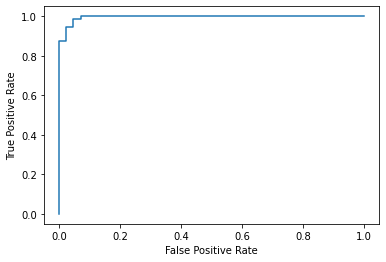

Área bajo la curva ROC (AUC): 0.995


In [23]:
# Calculamos la curva ROC.
fpr, tpr, _ = roc_curve(y_test, pred_test)

# Pintamos la curva ROC.
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Área bajo la curva ROC (AUC).
print('Área bajo la curva ROC (AUC):', round(roc_auc_score(y_test, pred_test), 3))

In [24]:
# Coeficiente de Gini.
print('Coeficiente de Gini:', round((2 * roc_auc_score(y_test, pred_test)) - 1, 2))

Coeficiente de Gini: 0.99
